# TensorFlow and Keras 

- Installing TensorFlow
- Loading images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# importing the keras image loading module 

from tensorflow.keras.preprocessing.image import load_img

In [ ]:
# loading the training images

#content/drive/MyDrive/7. Neural_Networks_&_Deep_Learning/train/t-shirt/00805d0e-7fe5-4251-b577-86065e4f6587.jpg
path = '/content/drive/MyDrive/7. Neural_Networks_&_Deep_Learning/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
fullname

'/content/drive/MyDrive/7. Neural_Networks_&_Deep_Learning/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

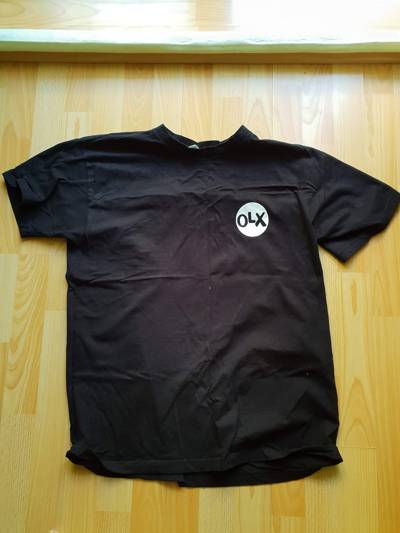

In [ ]:
# load the image 

load_img(fullname)

**Note:**

Keras only suppose some certain sizes, which are:
- 299 x 299
- 224 x 224
- 150 x 150

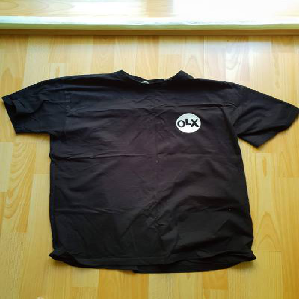

In [ ]:
# resize

img = load_img(fullname, target_size=(299, 299))
img

In [ ]:
# put the image in a numpy array 

x = np.array(img)
x.shape

(299, 299, 3)

# Pre-trained convolutional neural networks

- Imagenet dataset
- Pre-trained models

In [ ]:
 # importing keras model that will be used (xception)
from tensorflow.keras.applications.xception import Xception
# import module for data preprocessing
from tensorflow.keras.applications.xception import preprocess_input
# import model predictions decoder module, which makes it human readable
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
# initialize the model 
# with preset parameters

model = Xception(weights='imagenet', input_shape=(299, 299, 3))


91884032/91884032 [==============================] - 0s 0us/step


In [ ]:
# create an image array

X = np.array([x])
X.shape

(1, 299, 299, 3)

In [ ]:
X

array([[[[179, 171,  99],
         [179, 171,  99],
         [181, 173, 101],
         ...,
         [251, 253, 248],
         [251, 253, 248],
         [251, 253, 248]],

        [[188, 179, 110],
         [187, 178, 109],
         [186, 177, 108],
         ...,
         [251, 252, 247],
         [251, 252, 247],
         [251, 252, 246]],

        [[199, 189, 127],
         [200, 190, 128],
         [200, 190, 128],
         ...,
         [250, 251, 245],
         [250, 251, 245],
         [250, 251, 245]],

        ...,

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [183, 135,  24],
         [181, 133,  22],
         [183, 135,  24]],

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [182, 134,  23],
         [180, 132,  21],
         [182, 134,  23]],

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [181, 133,  22],
        

In [ ]:
# preprocessing the input 

X = preprocess_input(X)

In [ ]:
X

array([[[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.41960788,  0.35686278, -0.20784312],
         ...,
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.9843137 ,  0.94509804]],

        [[ 0.47450984,  0.4039216 , -0.1372549 ],
         [ 0.4666667 ,  0.39607847, -0.14509803],
         [ 0.45882356,  0.38823533, -0.15294117],
         ...,
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.92941177]],

        [[ 0.56078434,  0.48235297, -0.00392157],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         ...,
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863]],

        ...,

        [[ 0.2941177 ,  0.18431377, -0

**Note:**

If the array is not preprocess before supplying into the model as an input, it numbers will be between 0 - 255. However, after the image is preprocessed, it numbers then fall between -1 - 1

This is very compulsory for us if we want our model to function correctly. Because it's the preprocessing that was used in training the model

In [ ]:
pred = model.predict(X)

1/1 [==============================] - 8s 8s/step


In [ ]:
pred.shape

(1, 1000)

In [ ]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n03595614', 'jersey', 0.6792449),
  ('n02916936', 'bulletproof_vest', 0.03960036),
  ('n04370456', 'sweatshirt', 0.035299573),
  ('n03710637', 'maillot', 0.01088412),
  ('n04525038', 'velvet', 0.0018057581)]]

Looking the at the output above, you'll notice that the model prediction is not peculiar to our particular case 

Since the project classes do not fall under the classes with which imagenet model was trained, which is why the model prediction did not predict the class of the image we supplied to the model.

To this end, it means that we can't imagenet model for this project.

Going forward, we will train different model with the classes we need for our particular case.

i.e we will adapted any pre-built model to our particular use case

# Convolutional neural networks

- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers... Read here:

**Taking Nokes**

Convolutional neural networks are the type of neural networks that are for images mostly. They consist of different types of layers:
- Convolutional layers
- Dense layers 

#### Convolutional layers
This consist of filters (small images like 5X5 in sizes). The filter contains simple shape. Each filter will be applied and slide across the image supplied to it which will result to a feature map (score accrue to the filter after it's application on the image). 
What feature map is doing is to calculate the similarities between a filter and an image. 
**High value in the feature map means that there is high similarity between the filter and that part of the image** 

It's very important to know there can be one `feature map` per `filter`

Processes
Round 1 (Convolution layer 1)
input ==> image 
output ==> feature maps (depending on the set filters)

Round 2 (Convolutional layer 2)
input ==> feature maps in round 1 (consider as image for round 2)
output ==> featurs maps (depending on the number filters set for CL2)
.
.
Until it gets to the layer we want

What these layers are doing is to check different patterns in the image. Going through these processes each layer learn more and more complex attribute of the image.

CL1 ==> uses simple filters 
CL2 ==> become complex filters (combine filters in the first layer )
CL3 ==> more complex filters 

The combine output of all the layers will be a **vector representation.** The vector representation progresses to **dense layers** then to **prediction.** Dense layers make use of vector representation to make final predictions

Vector representation could be in 2048 or 1024

Neural Networks = Multiple Logistic Regression




# Transfer learning 

- Reading data with `ImageDataGenerator`
- Train `Xception` on smaller images (150x150)

The `imagenet` was trained with thousands of different classes. It convolution layers are kind of peculiar to the project problem, but the dense layers are not peculiar to the project problem because the classes are different, since they run to thousands. 

`Solution`

Convolutional layers will be kept, while dense layers will not be used. We trained another dense layers for the 10 classes in our project problem.

**Note:** this is the idea behind `Transfer Learning`

The model has already been built with convolution layers, it's the result of the convolution layers (vector representation) that we build our dense layers ontop (transfer learning). 

In [ ]:
## import the module to read the new images 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# read and generate the training data 

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# read from directory
# make it train dataset

train_ds = train_gen.flow_from_directory('/content/drive/MyDrive/7. Neural_Networks_&_Deep_Learning/train', 
                              target_size=(150, 150), 
                              batch_size=32)

Found 3068 images belonging to 10 classes.


In [ ]:
# checking the classes of the read images 

train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
# get the feature images and labels

X, y = next(train_ds)

In [ ]:
# This will return the preprocessed first batch of images that
# will be supplied to the model 
# check the shape
X.shape

(32, 150, 150, 3)

- 32 ==> number of the images
- 150 ==> shape of the images (the one we resized)
- 150 ==> shape of the images 
- 3 ==> the colour (Red, Green, Blue)

In [ ]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
# Checking the target variable
# this will between 0 and 1
# it has already been transforming through one hot encoding 

y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

**Validation Dataset**

In [ ]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('/content/drive/MyDrive/7. Neural_Networks_&_Deep_Learning/validation', 
                                     target_size=(150, 150), 
                                     batch_size=32, 
                                     shuffle=False)

Found 341 images belonging to 10 classes.


**Training the model**

The base model here will be `Xception` trained earlier that will be using it's convolution layers and build dense layers (custom model) ontop of it. 

In [ ]:
# note: include_top parameter will be removed dense layers 
# from Xception model

base_model = Xception(weights='imagenet', 
                      include_top=False, 
                      input_shape= (150, 150, 3))

# note: we are trained this model, we just want to extract the 
# vector repsentation

base_model.trainable = False

83683744/83683744 [==============================] - 3s 0us/step


In [ ]:
# creating new top (new dense layers)

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

outputs = base 

model = keras.Model(inputs, outputs)

In [ ]:
preds = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [ ]:
preds.shape

(32, 5, 5, 2048)

The result is in a 3 dimension, when the size (32) of the images is removed. This dimension will be transformed vector repsentation (1D). 

This will be done by Global Average Pooling 2D

In [ ]:
# creating new top (new dense layers)
# pooling to get the 1D vector repsentation 

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

outputs = vectors 

model = keras.Model(inputs, outputs)

In [ ]:
preds = model.predict(X)
preds.shape

1/1 [==============================] - 1s 707ms/step


(32, 2048)

This has been shrinkled into 1D vector representation for each of the images 

We want to turn the vector repsentation to prediction. This will be done by the use of dense layers 


In [ ]:
base_model = Xception(weights='imagenet', 
                      include_top=False, 
                      input_shape= (150, 150, 3))

base_model.trainable = False

# creating new top (new dense layers)
# pooling to get the 1D vector repsentation
# adding the dense layers  

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

# 10 in the dense layer represent the number of classes

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
# the prediction will have different shape 
preds = model.predict(X)
preds.shape

1/1 [==============================] - 1s 750ms/step


(32, 10)

Training the model 

Here, we will use optimizer. 

The weights that will be used for each feature need to be trained. The weights need to be changed to find the one that perform better, and the thing that's changing the weights is called `optimizer.` Optimizer changes the weights so that the model can learn something.

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# the losses with multi-class entropy
# since we are dealing with multi-classification
# from_logits = True since we dont want our result to be 
# a probability 

loss = keras.losses.CategoricalCrossentropy(from_logits=True)
#note: the lower the number losses entropy, the better 
# optimizer then tries to optimize the numbers 

# compiling the model

model.compile(optimizer=optimizer, 
              loss=loss, 
              metrics=['accuracy'])


In [ ]:
# now fit the compile model to the training dataset

history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 1642s 17s/step - loss: 1.2715 - accuracy: 0.6672 - val_loss: 0.8723 - val_accuracy: 0.7683
Epoch 2/10
96/96 [==============================] - 20s 210ms/step - loss: 0.6197 - accuracy: 0.8067 - val_loss: 0.8516 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 21s 222ms/step - loss: 0.4114 - accuracy: 0.8647 - val_loss: 0.8615 - val_accuracy: 0.7947
Epoch 4/10
96/96 [==============================] - 20s 210ms/step - loss: 0.2250 - accuracy: 0.9175 - val_loss: 0.8461 - val_accuracy: 0.8123
Epoch 5/10
96/96 [==============================] - 20s 210ms/step - loss: 0.1736 - accuracy: 0.9377 - val_loss: 0.9916 - val_accuracy: 0.7566
Epoch 6/10
96/96 [==============================] - 22s 224ms/step - loss: 0.1500 - accuracy: 0.9482 - val_loss: 0.9076 - val_accuracy: 0.7947
Epoch 7/10
96/96 [==============================] - 20s 206ms/step - loss: 0.0939 - accuracy: 0.9658 - val_loss: 0.9096 - val_accuracy: 0.8094

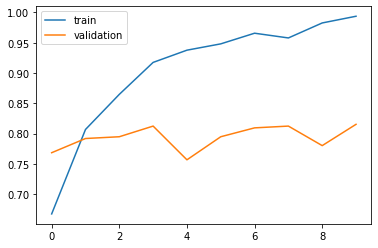

In [ ]:
# plotting the performance for each epoch (eta)

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')

plt.legend()

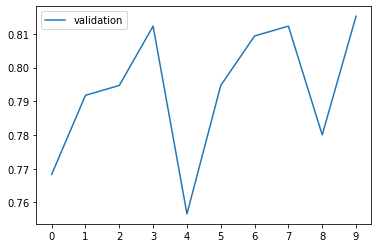

In [ ]:
## Removing the training plot 

plt.plot(history.history['val_accuracy'], label='validation')
plt.xticks(np.arange(10))
plt.legend()

We will going with epoch 1 because it seems have performed better, while others seem to have overfitted 

# Adjusting the learning rate 

- What's the learning rate 
- Trying different values 

In [ ]:
# defining a function 

def make_model(learning_rate=0.01):
  base_model = Xception(weights='imagenet', 
                        include_top=False, 
                        input_shape= (150, 150, 3))

  base_model.trainable = False

  ################################################

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
  outputs = keras.layers.Dense(10)(vectors)
  model = keras.Model(inputs, outputs)

  ################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, 
                loss=loss, 
                metrics=['accuracy'])

  
  return model

In [ ]:
# iterating over different values of learning rate 

scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
  print(lr)

  model = make_model(learning_rate=lr)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[lr] = history.history

  print()
  print()

0.0001
Epoch 1/10
96/96 [==============================] - 26s 242ms/step - loss: 1.9302 - accuracy: 0.3465 - val_loss: 1.6031 - val_accuracy: 0.4809
Epoch 2/10
96/96 [==============================] - 20s 207ms/step - loss: 1.3943 - accuracy: 0.5590 - val_loss: 1.2555 - val_accuracy: 0.6129
Epoch 3/10
96/96 [==============================] - 20s 207ms/step - loss: 1.1514 - accuracy: 0.6343 - val_loss: 1.0796 - val_accuracy: 0.6716
Epoch 4/10
96/96 [==============================] - 21s 215ms/step - loss: 1.0113 - accuracy: 0.6786 - val_loss: 0.9602 - val_accuracy: 0.7331
Epoch 5/10
96/96 [==============================] - 20s 205ms/step - loss: 0.9188 - accuracy: 0.7083 - val_loss: 0.8878 - val_accuracy: 0.7361
Epoch 6/10
96/96 [==============================] - 20s 205ms/step - loss: 0.8505 - accuracy: 0.7246 - val_loss: 0.8307 - val_accuracy: 0.7654
Epoch 7/10
96/96 [==============================] - 21s 217ms/step - loss: 0.7973 - accuracy: 0.7399 - val_loss: 0.7900 - val_accuracy:

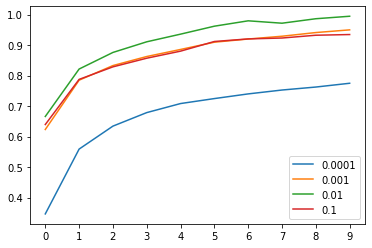

In [ ]:
# plotting performances for each learning rate 
# for training 

for lr, hist in scores.items():
  plt.plot(hist['accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

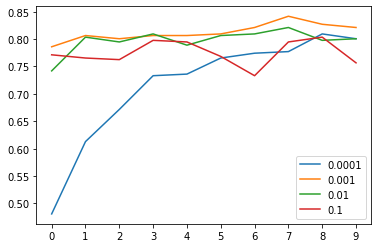

In [ ]:
# plotting performances for each learning rate 
# for validation 

for lr, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

I want delete learning rate at 0.1 and 0.0001

Then plot again

In [ ]:
del scores[0.1]
del scores[0.0001]

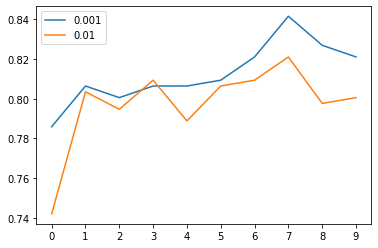

In [ ]:
# after some learning rate 
# for validation 

for lr, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

- The better `learning` rate is at **0.01**

# Checkpointing

- Saving the best model only
- Training a model with callbacks

**Checkpointing** is a way of saving our after each iteration or after certain conditions are met 

Note: this only save the best one 

In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor = 'val_accuracy',
    mode = 'max'
    )

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds, 
    epochs=10, 
    validation_data=val_ds,
    callbacks = [checkpoint])

Epoch 1/10
96/96 [==============================] - 25s 238ms/step - loss: 1.1358 - accuracy: 0.6226 - val_loss: 0.7401 - val_accuracy: 0.7625
Epoch 2/10
96/96 [==============================] - 20s 211ms/step - loss: 0.6479 - accuracy: 0.7836 - val_loss: 0.6253 - val_accuracy: 0.8006
Epoch 3/10
96/96 [==============================] - 20s 208ms/step - loss: 0.5163 - accuracy: 0.8227 - val_loss: 0.5793 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 21s 221ms/step - loss: 0.4364 - accuracy: 0.8608 - val_loss: 0.5731 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 20s 209ms/step - loss: 0.3782 - accuracy: 0.8872 - val_loss: 0.5597 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 20s 208ms/step - loss: 0.3306 - accuracy: 0.9048 - val_loss: 0.5339 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 21s 218ms/step - loss: 0.2951 - accuracy: 0.9182 - val_loss: 0.5598 - val_accuracy: 0.8123

# Adding more layers 

- Adding one inner dense layers 
- Experimenting with different sizes of inner layer


We already have the Version 1 of the model, where we only trained the model with vector representation and output prediction

Now, we to train the another model again by adding `one inner dense layer` between the vector representatio and the output prediction

We want to make the `inner dense layer (classes)` to ==> 100

Activation function will be added to the inner dense layer 

Types of activation functions

- Relu (rectified linear unit)==> added to the inner layer
- softmax ==> added to the output layer for probability result 
- sigmoid ==> added to the output 

In [ ]:
# defining a function 

def make_model(learning_rate=0.01, size_inner=100):
  base_model = Xception(weights='imagenet', 
                        include_top=False, 
                        input_shape= (150, 150, 3))

  base_model.trainable = False

  ############## Vector Representation ###########################

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  ############## Inner Dense Layer #################

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

  ############## Output ##################

  outputs = keras.layers.Dense(10)(inner)
  model = keras.Model(inputs, outputs)

  ################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, 
                loss=loss, 
                metrics=['accuracy'])

  
  return model

In [ ]:
# tuning the size of the layers 

learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
  print(size)

  model = make_model(learning_rate=learning_rate, size_inner=size)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[size] = history.history

  print()
  print()

10
Epoch 1/10
96/96 [==============================] - 25s 229ms/step - loss: 1.5086 - accuracy: 0.4664 - val_loss: 1.1935 - val_accuracy: 0.5982
Epoch 2/10
96/96 [==============================] - 20s 208ms/step - loss: 1.0564 - accuracy: 0.6333 - val_loss: 0.9795 - val_accuracy: 0.6598
Epoch 3/10
96/96 [==============================] - 20s 209ms/step - loss: 0.8331 - accuracy: 0.6982 - val_loss: 0.8084 - val_accuracy: 0.7478
Epoch 4/10
96/96 [==============================] - 21s 217ms/step - loss: 0.6721 - accuracy: 0.7669 - val_loss: 0.7072 - val_accuracy: 0.7830
Epoch 5/10
96/96 [==============================] - 20s 205ms/step - loss: 0.5475 - accuracy: 0.8233 - val_loss: 0.6470 - val_accuracy: 0.7830
Epoch 6/10
96/96 [==============================] - 20s 205ms/step - loss: 0.4569 - accuracy: 0.8537 - val_loss: 0.6152 - val_accuracy: 0.7977
Epoch 7/10
96/96 [==============================] - 21s 216ms/step - loss: 0.4035 - accuracy: 0.8739 - val_loss: 0.6020 - val_accuracy: 0.7

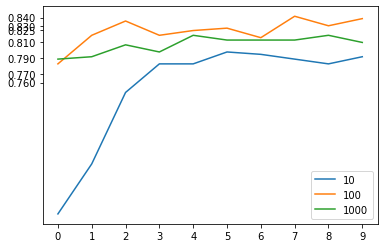

In [ ]:
## plotting the above results

for size, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=size)

plt.xticks(np.arange(10))
plt.yticks([0.76, 0.77, 0.79, 0.81, 0.825, 0.83, 0.84])
plt.legend()

Dense layer size at 100 is best 

# Regularization and dropout 

- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values 

The main idea behind `dropout` is to keep part of an image blind to the model training it using epochs. This helps the model learn better and be able to generalise. It makes the model not to overfit.

This will be done when transmiting this to dense layer 

In [ ]:
# adding regularization and dropout to the 
# inner dense

def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
  base_model = Xception(weights='imagenet', 
                        include_top=False, 
                        input_shape= (150, 150, 3))

  base_model.trainable = False

  ############## Vector Representation ###########################

  inputs = keras.Input(shape=(150, 150, 3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  ############## Inner Dense Layer #################

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
  drop = keras.layers.Dropout(droprate)(inner)

  ############## Output ##################

  outputs = keras.layers.Dense(10)(drop)
  model = keras.Model(inputs, outputs)

  ################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer, 
                loss=loss, 
                metrics=['accuracy'])

  
  return model

In [ ]:
# tuning the size of the layers 

learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
  print(droprate)

  model = make_model(
      learning_rate=learning_rate, 
      size_inner=size, 
      droprate=droprate)
  history = model.fit(train_ds, epochs=30, validation_data=val_ds)
  scores[droprate] = history.history

  print()
  print()

0.0
Epoch 1/30
96/96 [==============================] - 24s 223ms/step - loss: 0.9693 - accuracy: 0.6643 - val_loss: 0.6734 - val_accuracy: 0.7801
Epoch 2/30
96/96 [==============================] - 21s 216ms/step - loss: 0.5037 - accuracy: 0.8204 - val_loss: 0.6164 - val_accuracy: 0.8123
Epoch 3/30
96/96 [==============================] - 20s 211ms/step - loss: 0.3436 - accuracy: 0.8889 - val_loss: 0.6328 - val_accuracy: 0.7889
Epoch 4/30
96/96 [==============================] - 21s 221ms/step - loss: 0.2548 - accuracy: 0.9188 - val_loss: 0.6049 - val_accuracy: 0.8094
Epoch 5/30
96/96 [==============================] - 21s 218ms/step - loss: 0.1741 - accuracy: 0.9557 - val_loss: 0.6488 - val_accuracy: 0.7859
Epoch 6/30
96/96 [==============================] - 20s 207ms/step - loss: 0.1305 - accuracy: 0.9658 - val_loss: 0.5990 - val_accuracy: 0.8182
Epoch 7/30
96/96 [==============================] - 21s 220ms/step - loss: 0.0900 - accuracy: 0.9863 - val_loss: 0.6013 - val_accuracy: 0.

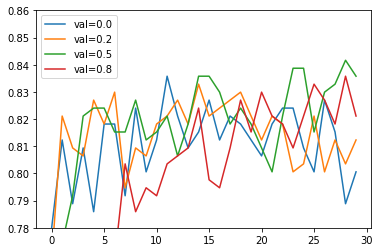

In [ ]:
## plotting the above results

for droprate, hist in scores.items():
  plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

#plt.xticks(np.arange(10))
#plt.yticks([0.76, 0.77, 0.79, 0.81, 0.825, 0.83, 0.84])
plt.ylim(0.78, 0.86)
plt.legend()

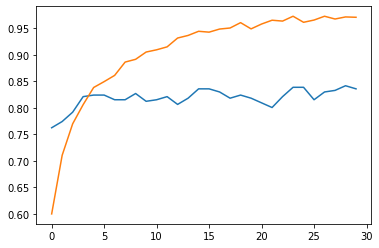

In [ ]:
# plotting droprate at 0.5 alone 

hist = scores[0.50]
plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
plt.plot(hist['accuracy'], label=('val=%s' % droprate))

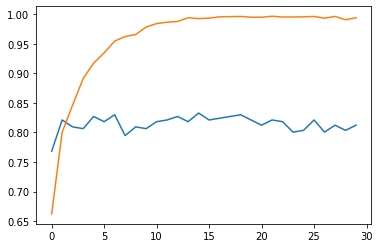

In [ ]:
# plotting droprate at 0.2 alone 

hist = scores[0.20]
plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
plt.plot(hist['accuracy'], label=('val=%s' % droprate))

We will be going **0.2** droprate 

# Data augmentation

- Different data augmentation
- Training a model with augmentations
- How to select data augmentations?

We want create more data existing data 

Methods
- Flipping the existing images (horizontal or vertical)
- Shifting the image
- Shear the image (pulling the one edge of the down or up)
- Zoom in/out 
- Brightness/contrast 
- Black Patch 

**Note:** We can combine all of these together at the same time 

WORKFLOWS

In [ ]:
# import image module

from PIL import Image

In [ ]:
# Let's create some helper functions for doing the augmentations

def apply_transform(x, transform_parameters):
    x = tf.keras.preprocessing.image.apply_affine_transform(x,
        transform_parameters.get('theta', 0),
        transform_parameters.get('tx', 0),
        transform_parameters.get('ty', 0),
        transform_parameters.get('shear', 0),
        transform_parameters.get('zx', 1),
        transform_parameters.get('zy', 1),
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        order=1
    )

    if transform_parameters.get('flip_horizontal', False):
        x = x[::-1, :, :]

    if transform_parameters.get('flip_vertical', False):
        x = x[:, ::-1, :]

    return x

In [ ]:
def augment(img, 
            rotation=0,
            height_shift=0,
            width_shift=0,
            shear=0,
            zoom_x=1,
            zoom_y=1,
            flip_horizontal=0,
            flip_vertical=0):

    x = np.array(img)

    transform_parameters = {
        'theta': rotation,
        'tx': height_shift,
        'ty': width_shift,
        'shear': shear,
        'zx': zoom_x,
        'zy': zoom_y,
        'flip_horizontal': flip_horizontal,
        'flip_vertical': flip_vertical,
    }
    
    xaug = apply_transform(x, transform_parameters)
    imgaug = Image.fromarray(xaug)
    return imgaug

In [ ]:
def show_augmentations(param, values, figsize=(20, 6)):
    imgs = []

    for v in values:
        im = augment(tshirt, **{param: v})
        imgs.append(im)

    plt.figure(figsize=figsize)

    n = len(values)

    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(np.array(imgs[i]))
        plt.title('%s=%s' % (param, values[i]))
        plt.axis("off")

    plt.show()    

Now we let's load an image

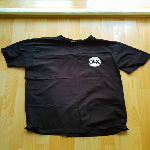

In [ ]:
tshirt = Image.open('/content/drive/MyDrive/7. Neural_Networks_&_Deep_Learning/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg')
tshirt = tshirt.resize((150, 150), resample=Image.NEAREST)
tshirt

Now let's check different augmentations

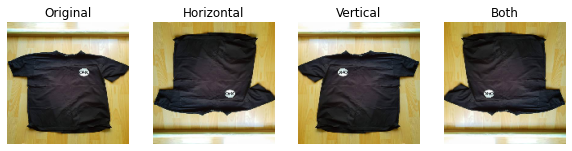

In [ ]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 4, 1)
plt.imshow(np.array(tshirt))
plt.title('Original')
plt.axis("off")


plt.subplot(1, 4, 2)

img = augment(tshirt, flip_horizontal=1)
plt.imshow(np.array(img))
plt.title('Horizontal')
plt.axis("off")


plt.subplot(1, 4, 3)

img = augment(tshirt, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Vertical')
plt.axis("off")


plt.subplot(1, 4, 4)

img = augment(tshirt, flip_horizontal=1, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Both')
plt.axis("off")

plt.show()

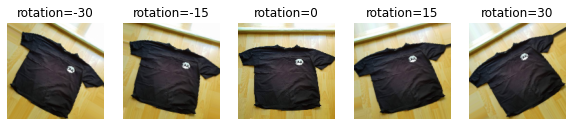

In [ ]:
param = 'rotation'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

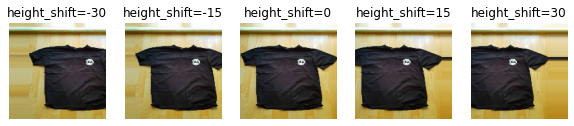

In [ ]:
param = 'height_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

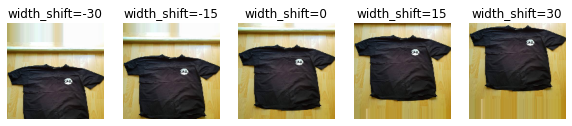

In [ ]:
param = 'width_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

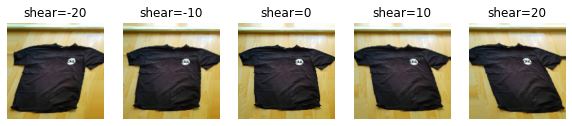

In [ ]:
param = 'shear'
values = [-20, -10, 0, 10, 20]
show_augmentations(param, values, (10, 3))

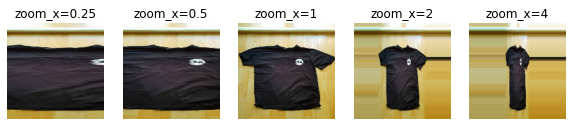

In [ ]:
param = 'zoom_x'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

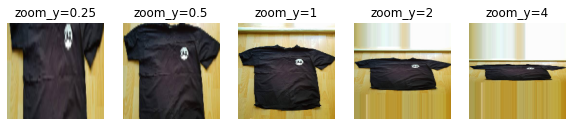

In [ ]:
param = 'zoom_y'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

We don't need to implement it manually, we can use `ImageDataGenerator` for that

In [ ]:
vis_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=5.0,
    height_shift_range=5.0,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

In [ ]:
x = np.array(tshirt)

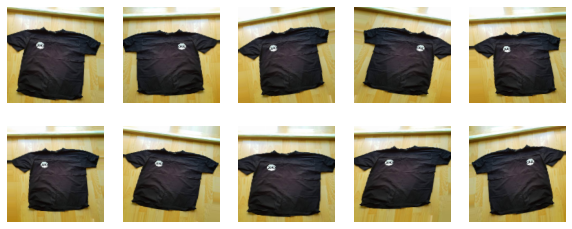

In [ ]:
plt.figure(figsize=(10, 4))

for i in range(10):
    t = vis_gen.get_random_transform((150, 150))
    xaug = vis_gen.apply_transform(x, t)

    plt.subplot(2, 5, i + 1)
    plt.imshow(xaug.astype('uint8'))
    plt.axis("off")

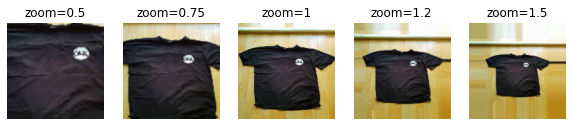

In [ ]:
values = [0.5, 0.75, 1, 1.2, 1.5]

imgs = []

for v in values:
    im = augment(tshirt, zoom_y=v, zoom_x=v)
    imgs.append(im)

plt.figure(figsize=(10, 3))

n = len(values)

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(np.array(imgs[i]))
    plt.title('%s=%s' % ('zoom', values[i]))
    plt.axis("off")

plt.show()

Now, augmenting our original data set

Choosing augmentation parameters depend on the following:
- Using your own judgement depending the your use case 
- Look at the dataset, what kind of variations are there?
-- Checking if the objects always centered or not? (if the not, rotate or shift the obeject)
- Tune it as a hyperparatemers to find the one's that are better for the use case 

In [ ]:
# data augmentation on training and validation dataset
# experimenting with different image generator parameters 

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,    
    shear_range=10, 
    zoom_range=0.1, 
    vertical_flip=True
    )

train_ds = train_gen.flow_from_directory('/content/drive/MyDrive/7. Neural_Networks_&_Deep_Learning/train', 
                              target_size=(150, 150), 
                              batch_size=32)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('/content/drive/MyDrive/7. Neural_Networks_&_Deep_Learning/validation', 
                                     target_size=(150, 150), 
                                     batch_size=32, 
                                     shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
# training the model with the newly augmentation  

learning_rate = 0.001
size = 100
droprate = 0.2


model = make_model(
    learning_rate=learning_rate, 
    size_inner=size, 
    droprate=droprate
    )

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/50
96/96 [==============================] - 810s 8s/step - loss: 1.2967 - accuracy: 0.5691 - val_loss: 0.7859 - val_accuracy: 0.7331
Epoch 2/50
96/96 [==============================] - 32s 335ms/step - loss: 0.8858 - accuracy: 0.7073 - val_loss: 0.7397 - val_accuracy: 0.7537
Epoch 3/50
96/96 [==============================] - 31s 321ms/step - loss: 0.7872 - accuracy: 0.7291 - val_loss: 0.6911 - val_accuracy: 0.7801
Epoch 4/50
96/96 [==============================] - 32s 335ms/step - loss: 0.7200 - accuracy: 0.7611 - val_loss: 0.6413 - val_accuracy: 0.7947
Epoch 5/50
96/96 [==============================] - 31s 325ms/step - loss: 0.6698 - accuracy: 0.7686 - val_loss: 0.6304 - val_accuracy: 0.8123
Epoch 6/50
96/96 [==============================] - 32s 331ms/step - loss: 0.5931 - accuracy: 0.7989 - val_loss: 0.6080 - val_accuracy: 0.7977
Epoch 7/50
96/96 [==============================] - 31s 320ms/step - loss: 0.54

In [ ]:
# plotting droprate at 0.2 alone 

hist = history.history
plt.plot(hist['val_accuracy'], label='validation')
plt.plot(hist['accuracy'], label='train')

NameError: ignored

# Training a larger model

- Train a 299x299 model

# Using the model

- Loading the model 
- Evaluating the model
- Getting predictions

# Summary 

- We can use pre-trained models for general image classification 
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions 
- Instead of training a model from scratch, we can use transfer learning